# Figures paper

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.display import display, HTML
from src.stats import *
from src.stats_sections import *
from src.results import *

def print_df(df):
    display(HTML(df.to_html()))

In [3]:
df = stats_roles_per_instrument("RoleX", split_role=False, norm=False, type_aggregation=None, dev=True)

annotations/mozart/mozart-symph32-k318-mvt1.orch processing...
annotations/mozart/mozart-symph33-k319-mvt1.orch processing...
annotations/mozart/mozart-symph34-k338-mvt1.orch processing...
annotations/mozart/mozart-symph35-k385-mvt1.orch processing...
annotations/mozart/mozart-symph36-k425-mvt1.orch processing...
annotations/mozart/mozart-symph38-k504-mvt1.orch processing...
annotations/mozart/mozart-symph39-k543-mvt1.orch processing...
annotations/mozart/mozart-symph40-k550-mvt1.orch processing...
annotations/mozart/mozart-symph41-k551-mvt1.orch processing...
annotations/haydn/haydn-symph099-mvt1.orch processing...
annotations/haydn/haydn-symph100-mvt1.orch processing...
annotations/haydn/haydn-symph101-mvt1.orch processing...
annotations/haydn/haydn-symph102-mvt1.orch processing...
annotations/haydn/haydn-symph103-mvt1.orch processing...
annotations/haydn/haydn-symph104-mvt1.orch processing...
annotations/beethoven/beethoven-symph1-op21-mvt1.orch processing...
annotations/beethoven/b

In [4]:
# si on veut que ce soit homogène en police d'écriture...
# plt.rcParams.update({"text.usetex": True})
# plt.rcParams.update({'font.size': 13})

## Table

In [5]:
dict_piece_to_role, dict_piece_to_relation = stats_count_roles_in_dataset('all', only_stats=True, dev=True)

annotations/mozart/mozart-symph32-k318-mvt1.orch processing...
# bars :  274
# annotated layers :  218
Average length of an annotation (in bars) :  3.53
Average number of instruments in one layer :  2.73
---
annotations/mozart/mozart-symph33-k319-mvt1.orch processing...
# bars :  370
# annotated layers :  248
Average length of an annotation (in bars) :  3.86
Average number of instruments in one layer :  2.17
---
annotations/mozart/mozart-symph34-k338-mvt1.orch processing...
# bars :  264
# annotated layers :  269
Average length of an annotation (in bars) :  3.11
Average number of instruments in one layer :  2.47
---
annotations/mozart/mozart-symph35-k385-mvt1.orch processing...
# bars :  204
# annotated layers :  170
Average length of an annotation (in bars) :  3.95
Average number of instruments in one layer :  2.56
---
annotations/mozart/mozart-symph36-k425-mvt1.orch processing...
# bars :  287
# annotated layers :  280
Average length of an annotation (in bars) :  2.7
Average number o

##  Distribution of instruments among the roles

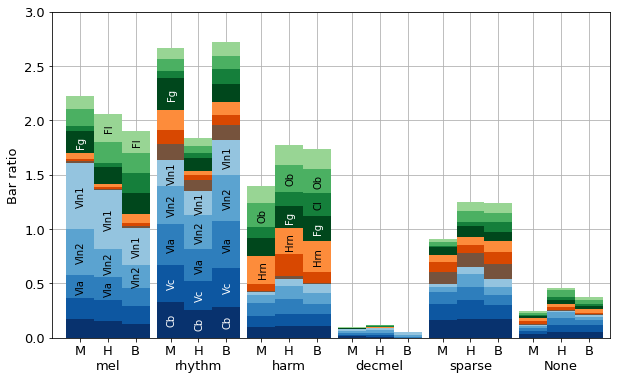

In [6]:
# From src.stats / plot_role_instr / case "type_aggregation == 'composer'"
y_df = df.groupby(['composer', 'role', 'instrument'], sort=False, as_index=False).agg(sum)
y_df['count'] /= y_df['length']
l_df = [y_df.loc[y_df['composer'] == composer] for composer in LIST_COMPOSERS]
ordered_y_df = pd.concat(l_df)
l_df = [ordered_y_df.loc[ordered_y_df['role'] == role] for role in POSSIBLE_ROLES]
ordered_y_df = pd.concat(l_df)

# Ignore TUTTI
ordered_y_df = ordered_y_df.loc[ordered_y_df['instrument'] != 'TUTTI']
instr_to_color_ignore_tutti = instr_to_color[1:]

ax = make_stack_catplot(df=ordered_y_df, xAxis='role', xCat='composer', yAxis='count', hueAxis='instrument', 
                        palette=instr_to_color_ignore_tutti, ticks_type='all',
                        norm=False, THIS_POSSIBLE_ROLES=POSSIBLE_AGGR_ROLES, THIS_CAT_LIST=LIST_COMPOSERS)

ax.set_xlim([-1, 19])
ax.set_ylim([0.0, 3.0])

# Layout - ticks
list_ticks = [tick.get_text() for tick in ax.get_xticklabels()]
new_list_ticks = []
for i, tick in enumerate(list_ticks):
    role, composer = tick.rsplit('_', 1)[0], tick.rsplit('_', 1)[1]
    if role in ['QR', 'None']:
        cypher_role = role
    else:
        cypher_role = CYPHER_ROLE[role]        
    cypher_composer = composer[0].upper()
    cypher_role = ('\n' + cypher_role) if cypher_composer == 'H' else ''
    new_list_ticks.append(cypher_composer + cypher_role)
ax.set_xticklabels(new_list_ticks, rotation=0, size=13)

ax.tick_params(axis='y', labelsize=13)

# Layout - annotation instrument
color_to_instr = dict((d,k) for k,d in dict_instr_color.items())
thr = 0.20
for i, patch in enumerate(ax.patches):
    if patch.get_height() > thr:
        this_instr = color_to_instr[patch.get_facecolor()]
        if this_instr in ['Vc', 'Cb', 'Fg']:
            color_text = 'w'
        else:
            color_text = 'k'
        rx, ry = patch.get_xy()
        cx = rx + patch.get_width() / 2.0 + .05
        cy = ry + patch.get_height() / 2.0
        ax.annotate(this_instr, (cx, cy), 
                    color=color_text, weight='roman', fontsize=10, 
                    ha='center', va='center', rotation=90)


# Layout axis name
ax.get_legend().remove()
plt.xlabel('') # Role / Composer')
plt.ylabel("Bar ratio", size=13)
plt.savefig(f"fig-instr-roles.pdf", format='pdf', bbox_inches='tight')

In [7]:
print("Melodic Vln1 in Mozart :", ordered_y_df.loc[(ordered_y_df['composer'] == 'mozart') & (ordered_y_df['role'] == 'MAIN_MEL') & (ordered_y_df['instrument'] == 'Vln1')]['count'].values)
print("Melodic layers in Mozart :", ordered_y_df.loc[(ordered_y_df['composer'] == 'mozart') & (ordered_y_df['role'] == 'MAIN_MEL')]['count'].sum())

Melodic Vln1 in Mozart : [0.61098398]
Melodic layers in Mozart : 2.2204424103737606


## Association of instruments

In [8]:
assoc_full = stats_association_in_same_layer(dev=True)

annotations/mozart/mozart-symph32-k318-mvt1.orch processing...
annotations/mozart/mozart-symph33-k319-mvt1.orch processing...
annotations/mozart/mozart-symph34-k338-mvt1.orch processing...
annotations/mozart/mozart-symph35-k385-mvt1.orch processing...
annotations/mozart/mozart-symph36-k425-mvt1.orch processing...
annotations/mozart/mozart-symph38-k504-mvt1.orch processing...
annotations/mozart/mozart-symph39-k543-mvt1.orch processing...
annotations/mozart/mozart-symph40-k550-mvt1.orch processing...
annotations/mozart/mozart-symph41-k551-mvt1.orch processing...
annotations/haydn/haydn-symph099-mvt1.orch processing...
annotations/haydn/haydn-symph100-mvt1.orch processing...
annotations/haydn/haydn-symph101-mvt1.orch processing...
annotations/haydn/haydn-symph102-mvt1.orch processing...
annotations/haydn/haydn-symph103-mvt1.orch processing...
annotations/haydn/haydn-symph104-mvt1.orch processing...
annotations/beethoven/beethoven-symph1-op21-mvt1.orch processing...
annotations/beethoven/b

/home/francesco/Documents/orchestration-public/src/stats.py:1109: RuntimeWarning: invalid value encountered in true_divide
  return array_n_bars_same_layer / array_n_bars_same_segment


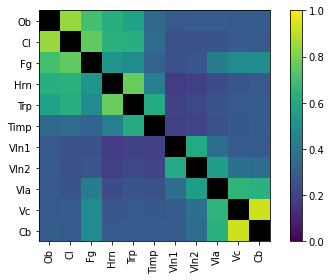

In [9]:
plot_array_instruments(assoc_full, SAVEFIG=False, SAVE_FILENAME="plot.pdf", vmax=1)

## Winds evolution 

annotations/mozart/mozart-symph32-k318-mvt1.orch processing...
annotations/mozart/mozart-symph33-k319-mvt1.orch processing...
annotations/mozart/mozart-symph34-k338-mvt1.orch processing...
annotations/mozart/mozart-symph35-k385-mvt1.orch processing...
annotations/mozart/mozart-symph36-k425-mvt1.orch processing...
annotations/mozart/mozart-symph38-k504-mvt1.orch processing...
annotations/mozart/mozart-symph39-k543-mvt1.orch processing...
annotations/mozart/mozart-symph40-k550-mvt1.orch processing...
annotations/mozart/mozart-symph41-k551-mvt1.orch processing...
annotations/haydn/haydn-symph099-mvt1.orch processing...
annotations/haydn/haydn-symph100-mvt1.orch processing...
annotations/haydn/haydn-symph101-mvt1.orch processing...
annotations/haydn/haydn-symph102-mvt1.orch processing...
annotations/haydn/haydn-symph103-mvt1.orch processing...
annotations/haydn/haydn-symph104-mvt1.orch processing...
annotations/beethoven/beethoven-symph1-op21-mvt1.orch processing...
annotations/beethoven/b

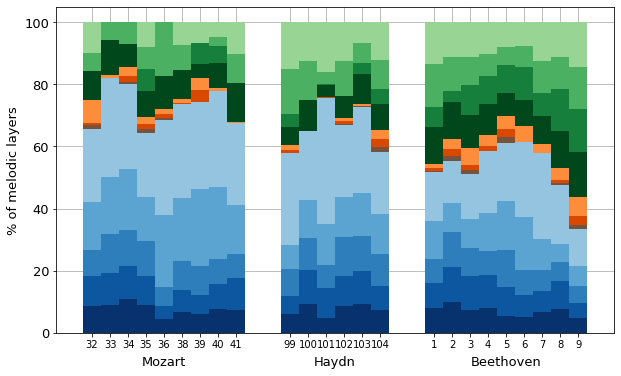

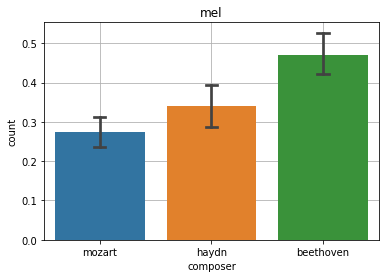

In [10]:
fig, ax = winds_evolution(select='mel', confidence=95, dev=True, ticks_type="all", ignore_tutti=True) 

# yticks
new_ylabels = [int(100*float(t.get_text())) for t in ax.get_yticklabels()[:-1]]
ax.set_yticks(ax.get_yticks()[:-1])
ax.set_yticklabels(new_ylabels)
ax.set_ylabel('% of melodic layers', size=13)

# xticks
x_labels_major = [32, 33, 34, 35, 36, 38, 39, 40, 41, 99, 100, 101, 102, 103, 104, 1, 2, 3, 4, 5, 6, 7, 8, 9]
ax.set_xticklabels(x_labels_major)

pos_composer = [4, 13.5, 23]
composers = ['Mozart', 'Haydn', 'Beethoven']
for x, comp in zip(pos_composer, composers):
    ax.text(x, -0.095, comp, horizontalalignment='center', verticalalignment='center', size=13)

# ax.set_xlabel('Symphony / Composer', labelpad=20)
ax.set_xlabel('', labelpad=20)

ax.set_title('')
ax.get_legend().remove()
ax.tick_params(axis='x', rotation=0)
ax.tick_params(axis='y', labelsize=13)
fig.savefig(f"fig-evolution-winds.pdf", format='pdf', bbox_inches='tight')

annotations/mozart/mozart-symph32-k318-mvt1.orch processing...
annotations/mozart/mozart-symph33-k319-mvt1.orch processing...
annotations/mozart/mozart-symph34-k338-mvt1.orch processing...
annotations/mozart/mozart-symph35-k385-mvt1.orch processing...
annotations/mozart/mozart-symph36-k425-mvt1.orch processing...
annotations/mozart/mozart-symph38-k504-mvt1.orch processing...
annotations/mozart/mozart-symph39-k543-mvt1.orch processing...
annotations/mozart/mozart-symph40-k550-mvt1.orch processing...
annotations/mozart/mozart-symph41-k551-mvt1.orch processing...
annotations/haydn/haydn-symph099-mvt1.orch processing...
annotations/haydn/haydn-symph100-mvt1.orch processing...
annotations/haydn/haydn-symph101-mvt1.orch processing...
annotations/haydn/haydn-symph102-mvt1.orch processing...
annotations/haydn/haydn-symph103-mvt1.orch processing...
annotations/haydn/haydn-symph104-mvt1.orch processing...
annotations/beethoven/beethoven-symph1-op21-mvt1.orch processing...
annotations/beethoven/b

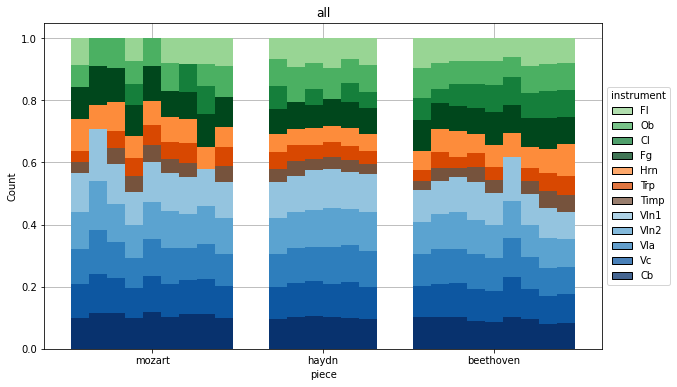

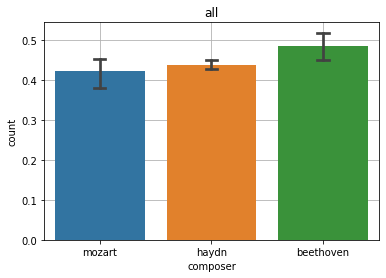

In [11]:
winds_evolution(select='all', confidence=95, dev=False, ignore_tutti=True) 

## Sections similarity

In [12]:
list_df_role_section = []
list_df_instr_section = []

for i, piece_row in df_pieces.iterrows():
    if piece_row['piece'] in ['mozart35', 'mozart32']: continue
    
    filename = piece_row['annotation']
    df_role_section, df_instr_section = instr_role_sonata_form(filename, split_role=False, norm=True, role_times_instr=True, title_file=None, dev=True, show=False)
    df_role_section['piece'] = piece_row['piece']
    df_instr_section['piece'] = piece_row['piece']
    list_df_role_section.append(df_role_section)
    list_df_instr_section.append(df_instr_section)

annotations/mozart/mozart-symph33-k319-mvt1.orch processing...
annotations/mozart/mozart-symph34-k338-mvt1.orch processing...
annotations/mozart/mozart-symph36-k425-mvt1.orch processing...
annotations/mozart/mozart-symph38-k504-mvt1.orch processing...
annotations/mozart/mozart-symph39-k543-mvt1.orch processing...
annotations/mozart/mozart-symph40-k550-mvt1.orch processing...
annotations/mozart/mozart-symph41-k551-mvt1.orch processing...
annotations/haydn/haydn-symph099-mvt1.orch processing...
annotations/haydn/haydn-symph100-mvt1.orch processing...
annotations/haydn/haydn-symph101-mvt1.orch processing...
annotations/haydn/haydn-symph102-mvt1.orch processing...
annotations/haydn/haydn-symph103-mvt1.orch processing...
annotations/haydn/haydn-symph104-mvt1.orch processing...
annotations/beethoven/beethoven-symph1-op21-mvt1.orch processing...
annotations/beethoven/beethoven-symph2-op36-mvt1.orch processing...
annotations/beethoven/beethoven-symph3-op55-mvt1.orch processing...
annotations/b

Similarity(P,P') >> mean : 0.02221656368418791 (+/- 0.005264409472705433) 
		 95% confidence : [0.016952154211482474 - 0.027480973156893344] 
Similarity(S,S') >> mean : 0.022071372446995585 (+/- 0.009051343436727302) 
		 95% confidence : [0.013020029010268283 - 0.03112271588372289] 
Similarity(C,C') >> mean : 0.03031246002545233 (+/- 0.013788740600225731) 
		 95% confidence : [0.0165237194252266 - 0.04410120062567806] 
Average other couples >> mean : 0.046301629877714856 (+/- 0.0033973993309472563) 
		 95 % confidence : [0.0429042305467676 - 0.049699029208662114] 


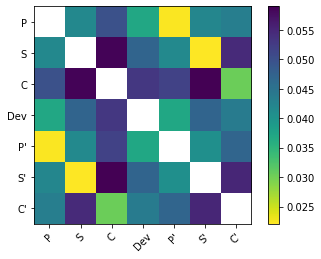

In [13]:
# LIST_SECTIONS = ["Intro", "P", "S", "C", "Dvpt", "P'", "S'", "C'", "Coda"]
LIST_SECTIONS = ["P", "S", "C", "Dev", "P'", "S'", "C'"]

ax_role, dist_matrix_roles = measure_similarity_sections(list_df_role_section, type_simil='role', dev=True, 
                                                         ignore_sections=["Int", "Cod"], normalize=6)
ax_role.set_xticklabels(LIST_SECTIONS)
ax_role.set_yticklabels(LIST_SECTIONS)

# for i in range(dist_matrix_roles.shape[0]):
#     for j in range(dist_matrix_roles.shape[1]):
#         ax_role.text(j,i, "{:.2f}".format(dist_matrix_roles[i,j]), ha="center", va="center", color="k")
    
plt.savefig(f"fig-similarity-sections-roles.pdf", format='pdf', bbox_inches='tight')

Similarity(P,P') >> mean : 0.0038065611327678436 (+/- 0.0008589017937458395) 
		 95% confidence : [0.002947659339022004 - 0.004665462926513683] 
Similarity(S,S') >> mean : 0.007269020349862442 (+/- 0.002864440332065233) 
		 95% confidence : [0.004404580017797209 - 0.010133460681927674] 
Similarity(C,C') >> mean : 0.0038331627757603195 (+/- 0.0011271305113359662) 
		 95% confidence : [0.002706032264424353 - 0.004960293287096285] 
Average other couples >> mean : 0.00854971897195162 (+/- 0.0008912524952177043) 
		 95 % confidence : [0.007658466476733915 - 0.009440971467169323] 


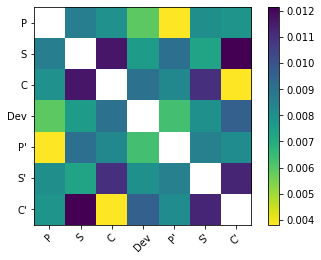

In [14]:
ax_instr, dist_matrix_instr = measure_similarity_sections(list_df_instr_section, type_simil='instrument', dev=True, 
                                                          ignore_sections=["Int", "Cod"], normalize=12)
ax_instr.set_xticklabels(LIST_SECTIONS)
ax_instr.set_yticklabels(LIST_SECTIONS)

# for i in range(dist_matrix_instr.shape[0]):
#     for j in range(dist_matrix_instr.shape[1]):
#         ax_instr.text(j,i, "{:.2f}".format(dist_matrix_instr[i,j]), ha="center", va="center", color="k")


plt.savefig(f"fig-similarity-sections-instruments.pdf", format='pdf', bbox_inches='tight')

## Numbers

### Count instruments / families playing

In [15]:
df_instr, df_family = count_bar_played_instruments()
print_df(df_instr)
print_df(df_family)

annotations/mozart/mozart-symph32-k318-mvt1.orch processing...
annotations/mozart/mozart-symph33-k319-mvt1.orch processing...
annotations/mozart/mozart-symph34-k338-mvt1.orch processing...
annotations/mozart/mozart-symph35-k385-mvt1.orch processing...
annotations/mozart/mozart-symph36-k425-mvt1.orch processing...
annotations/mozart/mozart-symph38-k504-mvt1.orch processing...
annotations/mozart/mozart-symph39-k543-mvt1.orch processing...
annotations/mozart/mozart-symph40-k550-mvt1.orch processing...
annotations/mozart/mozart-symph41-k551-mvt1.orch processing...
annotations/haydn/haydn-symph099-mvt1.orch processing...
annotations/haydn/haydn-symph100-mvt1.orch processing...
annotations/haydn/haydn-symph101-mvt1.orch processing...
annotations/haydn/haydn-symph102-mvt1.orch processing...
annotations/haydn/haydn-symph103-mvt1.orch processing...
annotations/haydn/haydn-symph104-mvt1.orch processing...
annotations/beethoven/beethoven-symph1-op21-mvt1.orch processing...
annotations/beethoven/b

### Percentages relations

In [16]:
dict_df_relation = {'piece' : [], 'length': [], 'composer': [],  'relation' : [], 'count' : []}
for piece, data in dict_piece_to_relation.items():
    dict_df_relation['piece'] += [piece] * len(data['relation_to_count'])
    dict_df_relation['length'] += [data['length']] * len(data['relation_to_count'])
    dict_df_relation['composer'] += [piece.split('_')[0]] * len(data['relation_to_count'])
    dict_df_relation['relation'] += data['relation_to_count'].keys()
    dict_df_relation['count'] += data['relation_to_count'].values()

df_relation = pd.DataFrame(dict_df_relation)

y = df_relation.groupby('relation', sort=False).agg(sum)['count']

print(y / sum(y))

relation
UNISSON       0.289506
PARALLEL      0.094456
HOMORHYTHM    0.239433
REST          0.000000
NONE          0.044668
QR            0.000000
SOLO          0.331938
Name: count, dtype: float64


### Percentages roles

In [17]:
dict_df_role = {'piece' : [], 'length': [], 'composer': [],  'role' : [], 'count' : []}
for piece, data in dict_piece_to_role.items():
    dict_df_role['piece'] += [piece] * len(data['role_to_count'])
    dict_df_role['length'] += [data['length']] * len(data['role_to_count'])
    dict_df_role['composer'] += [piece.split('_')[0]] * len(data['role_to_count'])
    dict_df_role['role'] += data['role_to_count'].keys()
    dict_df_role['count'] += data['role_to_count'].values()

df_role = pd.DataFrame(dict_df_role)
df_lengths = df.groupby('piece').agg('mean') # the length is the same for each row, so no matter the agg function

y = df_role.groupby('role', sort=False).agg(sum)['count']
length_tot = sum(df_lengths['length'])
y_norm = y / length_tot

print(y_norm)
print("Ratio None / Nb layers : ", y['None'] / sum(y))

role
MAIN_MEL             0.675305
RHYTHM               0.306637
REPEAT_NOTE          0.239329
OSCILLATION          0.042800
BATTERIE             0.065080
ARPEGGIO             0.143644
SCALE                0.084193
HARM                 0.485929
DECORATIVE_MEL       0.040689
SPARSE               0.295614
None                 0.140009
QR                   0.000000
ALL_RHYTHM           0.647631
ALL_OSCILLATION      0.106121
ALL_VERY_RHYTHMIC    0.758795
ALL_VERY_MELODIC     0.675422
ALL_VERY_HARMONIC    0.655253
Name: count, dtype: float64
Ratio None / Nb layers :  0.02610920382235245


### Instruments roles - Melodic strings

In [18]:
df_instr_roles = stats_roles_per_instrument("RoleX", split_role=False, norm=True, type_aggregation=None, dev=True)

new_name_axis = "role_composer"
df_instr_roles[new_name_axis] = df_instr_roles['role'] + "_" + df_instr_roles['composer']
df_norm = df_instr_roles.copy()
sum_all = df_norm.groupby(new_name_axis).agg(sum).to_dict()['count']
for index, row in df_norm.iterrows():
    if sum_all[row[new_name_axis]] != 0:
        df_norm.loc[index, 'count'] = row['count'] / sum_all[row[new_name_axis]]
    else:
        df_norm.loc[index, 'count'] = 0

annotations/mozart/mozart-symph32-k318-mvt1.orch processing...
annotations/mozart/mozart-symph33-k319-mvt1.orch processing...
annotations/mozart/mozart-symph34-k338-mvt1.orch processing...
annotations/mozart/mozart-symph35-k385-mvt1.orch processing...
annotations/mozart/mozart-symph36-k425-mvt1.orch processing...
annotations/mozart/mozart-symph38-k504-mvt1.orch processing...
annotations/mozart/mozart-symph39-k543-mvt1.orch processing...
annotations/mozart/mozart-symph40-k550-mvt1.orch processing...
annotations/mozart/mozart-symph41-k551-mvt1.orch processing...
annotations/haydn/haydn-symph099-mvt1.orch processing...
annotations/haydn/haydn-symph100-mvt1.orch processing...
annotations/haydn/haydn-symph101-mvt1.orch processing...
annotations/haydn/haydn-symph102-mvt1.orch processing...
annotations/haydn/haydn-symph103-mvt1.orch processing...
annotations/haydn/haydn-symph104-mvt1.orch processing...
annotations/beethoven/beethoven-symph1-op21-mvt1.orch processing...
annotations/beethoven/b

In [19]:
grouped_df = df_norm.groupby(['composer', 'role', 'instrument'], as_index=False).agg(sum)
mean_bass_strings = 0
for composer in LIST_COMPOSERS:
    n_part = 0
    n_VcCb = 0
    for instr in family_to_instr['strings']:
        part_instr = float(grouped_df.loc[(grouped_df['composer'] == composer) & (grouped_df['instrument'] == instr) & (grouped_df['role'] == 'MAIN_MEL')]['count'])
        print(composer, instr, part_instr)
        n_part += part_instr
        if instr in ['Vln2', 'Vla', 'Vc', 'Cb']:
            n_VcCb += part_instr
            
    mean_bass_strings += n_VcCb / n_part # Part des Vc.Cb quand ils sont tous ensemble
    print("From bass strings : ", n_VcCb / n_part)
    print("Total composer : ", n_part)
    print()

print("Total melodic bass strings alongside with Vln1: ", mean_bass_strings/3)

mozart Vln1 0.2751631741669529
mozart Vln2 0.18979732050841636
mozart Vla 0.0953280659567159
mozart Vc 0.08691171418756441
mozart Cb 0.0788388869804191
From bass strings :  0.6210078069552875
Total composer :  0.7260391618000687

haydn Vln1 0.2620909354184767
haydn Vln2 0.12539820445988994
haydn Vla 0.1019403417318274
haydn Vc 0.09325224442513756
haydn Cb 0.07616565305531423
From bass strings :  0.6021978021978022
Total composer :  0.6588473790906458

beethoven Vln1 0.1763975155279503
beethoven Vln2 0.11229813664596273
beethoven Vla 0.08596273291925466
beethoven Vc 0.08670807453416149
beethoven Cb 0.06732919254658386
From bass strings :  0.6663533834586467
Total composer :  0.528695652173913

Total melodic bass strings alongside with Vln1:  0.6298529975372454


### Harm

In [20]:
grouped_df = df_norm.groupby(['composer', 'role', 'instrument'], as_index=False).agg(sum)
mean_brass = 0
mean_woodwinds = 0
mean_strings = 0
for composer in LIST_COMPOSERS:
    n_part_brass = 0
    n_part_woodwinds = 0
    n_part_strings = 0
    for instr in family_to_instr['woodwinds']:
        part_instr = float(grouped_df.loc[(grouped_df['composer'] == composer) & (grouped_df['instrument'] == instr) & (grouped_df['role'] == 'HARM')]['count'])
        print(composer, instr, part_instr)
        n_part_woodwinds += part_instr
    print()
    for instr in family_to_instr['brass']:
        part_instr = float(grouped_df.loc[(grouped_df['composer'] == composer) & (grouped_df['instrument'] == instr) & (grouped_df['role'] == 'HARM')]['count'])
        print(composer, instr, part_instr)
        n_part_brass += part_instr
    print()
    for instr in family_to_instr['strings']:
        part_instr = float(grouped_df.loc[(grouped_df['composer'] == composer) & (grouped_df['instrument'] == instr) & (grouped_df['role'] == 'HARM')]['count'])
        print(composer, instr, part_instr)
        n_part_strings += part_instr
    print()

    print("Total composer woodwinds : ", n_part_woodwinds)
    print("Total composer brass : ", n_part_brass)
    print("Total composer strings : ", n_part_strings)
    mean_woodwinds += n_part_woodwinds
    mean_brass += n_part_brass
    mean_strings += n_part_strings
    print("---")
print()
print("Avg harm woodwinds : ", mean_woodwinds/3)
print("Avg harm brass : ", mean_brass/3)
print("Avg harm strings : ", mean_strings/3)

mozart Fl 0.10712328767123287
mozart Ob 0.16356164383561644
mozart Cl 0.06684931506849315
mozart Fg 0.1210958904109589

mozart Hrn 0.18465753424657533
mozart Trp 0.04986301369863014
mozart Timp 0.002191780821917808

mozart Vln1 0.023013698630136987
mozart Vln2 0.04904109589041096
mozart Vla 0.08575342465753424
mozart Vc 0.07561643835616438
mozart Cb 0.07123287671232877

Total composer woodwinds :  0.4586301369863014
Total composer brass :  0.23671232876712328
Total composer strings :  0.3046575342465753
---
haydn Fl 0.10483870967741936
haydn Ob 0.1424731182795699
haydn Cl 0.06922043010752688
haydn Fg 0.11458333333333333

haydn Hrn 0.1350806451612903
haydn Trp 0.11155913978494623
haydn Timp 0.017473118279569894

haydn Vln1 0.035282258064516125
haydn Vln2 0.07056451612903225
haydn Vla 0.07661290322580645
haydn Vc 0.0625
haydn Cb 0.05981182795698925

Total composer woodwinds :  0.43111559139784944
Total composer brass :  0.26411290322580644
Total composer strings :  0.30477150537634407
--

### Melodic basses

In [21]:
count_independant_bass_strings()

annotations/mozart/mozart-symph32-k318-mvt1.orch processing...
# bars where melodic bass strings only / length piece 0.06204379562043796
annotations/mozart/mozart-symph33-k319-mvt1.orch processing...
# bars where melodic bass strings only / length piece 0.06756756756756757
annotations/mozart/mozart-symph34-k338-mvt1.orch processing...
# bars where melodic bass strings only / length piece 0.07196969696969698
annotations/mozart/mozart-symph35-k385-mvt1.orch processing...
# bars where melodic bass strings only / length piece 0.10784313725490197
annotations/mozart/mozart-symph36-k425-mvt1.orch processing...
# bars where melodic bass strings only / length piece 0.059233449477351915
annotations/mozart/mozart-symph38-k504-mvt1.orch processing...
# bars where melodic bass strings only / length piece 0.0728476821192053
annotations/mozart/mozart-symph39-k543-mvt1.orch processing...
# bars where melodic bass strings only / length piece 0.045307443365695796
annotations/mozart/mozart-symph40-k550-m

### Harmonic Hrn

In [22]:
total_hrn = sum(df_instr_roles.loc[df_instr_roles['instrument'] == 'Hrn']['count'])
total_hrn_harm = sum(df_instr_roles.loc[(df_instr_roles['role'] == 'HARM') & (df_instr_roles['instrument'] == 'Hrn')]['count'])

print("Harmonic Hrn : ", total_hrn_harm / total_hrn)

Harmonic Hrn :  0.4688847812692545


In [23]:
avg_harm = 0
for instr in LIST_POSSIBLE_INSTRUMENTS:
    if instr == 'Hrn':
        continue
    total_instr = sum(df_instr_roles.loc[df_instr_roles['instrument'] == instr]['count'])
    total_instr_harm = sum(df_instr_roles.loc[(df_instr_roles['role'] == 'HARM') & (df_instr_roles['instrument'] == instr)]['count'])
    print(instr, total_instr_harm/total_instr)
    avg_harm += total_instr_harm/total_instr

print()
print("Average harm other : ", avg_harm / (len(LIST_POSSIBLE_INSTRUMENTS) - 1))

Fl 0.30867293625914316
Ob 0.3624421831637373
Cl 0.35975943138326955
Fg 0.2912034009156311
Trp 0.3169474046063939
Timp 0.039525691699604744
Vln1 0.07200837915684734
Vln2 0.10568890067630288
Vla 0.1295653381474795
Vc 0.13631205673758864
Cb 0.1339939024390244

Average harm other :  0.2051017841077293


### Timpani in TUTTI

In [24]:
n_tuttis = count_tuttis()

annotations/mozart/mozart-symph32-k318-mvt1.orch processing...
annotations/mozart/mozart-symph33-k319-mvt1.orch processing...
annotations/mozart/mozart-symph34-k338-mvt1.orch processing...
annotations/mozart/mozart-symph35-k385-mvt1.orch processing...
annotations/mozart/mozart-symph36-k425-mvt1.orch processing...
annotations/mozart/mozart-symph38-k504-mvt1.orch processing...
annotations/mozart/mozart-symph39-k543-mvt1.orch processing...
annotations/mozart/mozart-symph40-k550-mvt1.orch processing...
annotations/mozart/mozart-symph41-k551-mvt1.orch processing...
annotations/haydn/haydn-symph099-mvt1.orch processing...
annotations/haydn/haydn-symph100-mvt1.orch processing...
annotations/haydn/haydn-symph101-mvt1.orch processing...
annotations/haydn/haydn-symph102-mvt1.orch processing...
annotations/haydn/haydn-symph103-mvt1.orch processing...
annotations/haydn/haydn-symph104-mvt1.orch processing...
annotations/beethoven/beethoven-symph1-op21-mvt1.orch processing...
annotations/beethoven/b

In [25]:
# total_tutti = sum(df_instr_roles.loc[df_instr_roles['instrument'] == 'TUTTI']['count'])
total_tutti = n_tuttis
total_timpani = sum(df_instr_roles.loc[df_instr_roles['instrument'] == 'Timp']['count'])
print("Timpani in tutti : ", total_tutti / (total_tutti + total_timpani))

Timpani in tutti :  0.3392530686863411


In [26]:
avg_instr_in_tutti = []
for instr in LIST_POSSIBLE_INSTRUMENTS:
    if instr in ['TUTTI', 'Timp']:
        continue
    total_instr = sum(df_instr_roles.loc[df_instr_roles['instrument'] == instr]['count'])
    print(instr, total_tutti/(total_instr + total_tutti))
    avg_instr_in_tutti.append(total_tutti/(total_instr + total_tutti))

print()
print("Average instrument in Tutti : ", np.mean(avg_instr_in_tutti))

Fl 0.21351084812623275
Ob 0.19376491646778043
Cl 0.2620536614888037
Fg 0.17518543492919758
Hrn 0.21060311284046693
Trp 0.30869771863117873
Vln1 0.14535078885532057
Vln2 0.14694570135746607
Vla 0.15282352941176472
Vc 0.1555874955084441
Cb 0.16528820460618399

Average instrument in Tutti :  0.19361921929298542
